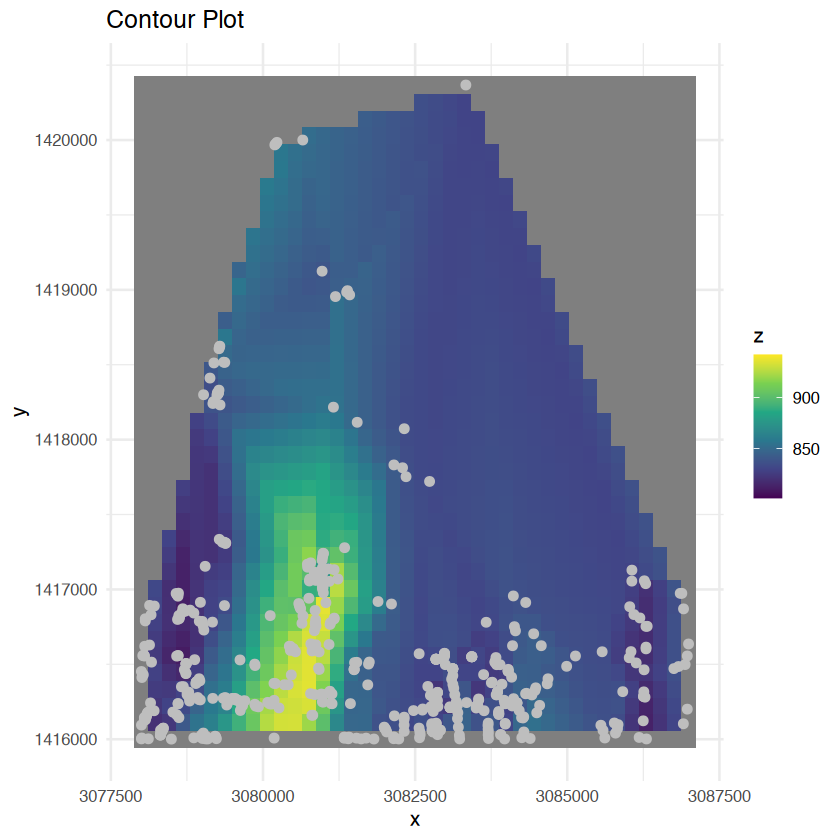

In [9]:
# Author: Piotr Rybarczyk

# Load necessary libraries
library(ggplot2)
library(dplyr)
# Akima requires additional fortran config on mac.
library(akima)

# Path to file with data
file_path <- './lib/data.csv'

# Read & parse data
data <- read.csv(file_path)
X <- data$x
Y <- data$y
Z <- data$z

# Build Grid data with interpolation
interp_data <- with(data, akima::interp(x, y, z, duplicate = "strip"))

# Setup amount of levels in contour
levels <- seq(min(Z), max(Z), length.out = 10)

# Prepare data for ggplot
plot_data <- expand.grid(x = interp$x, y = interp$y)
plot_data$z <- interp$z[cbind(match(plot_data$x, interp$x), match(plot_data$y, interp$y))]

# Plotting
ggplot() +
  geom_tile(data = plot_data, aes(x = x, y = y, fill = z)) +
  scale_fill_viridis_c(limits = range(levels)) +
  geom_point(data = data, aes(x = X, y = Y), color = "grey", size = 2) +
  theme_minimal() +
  labs(title = "Contour Plot")


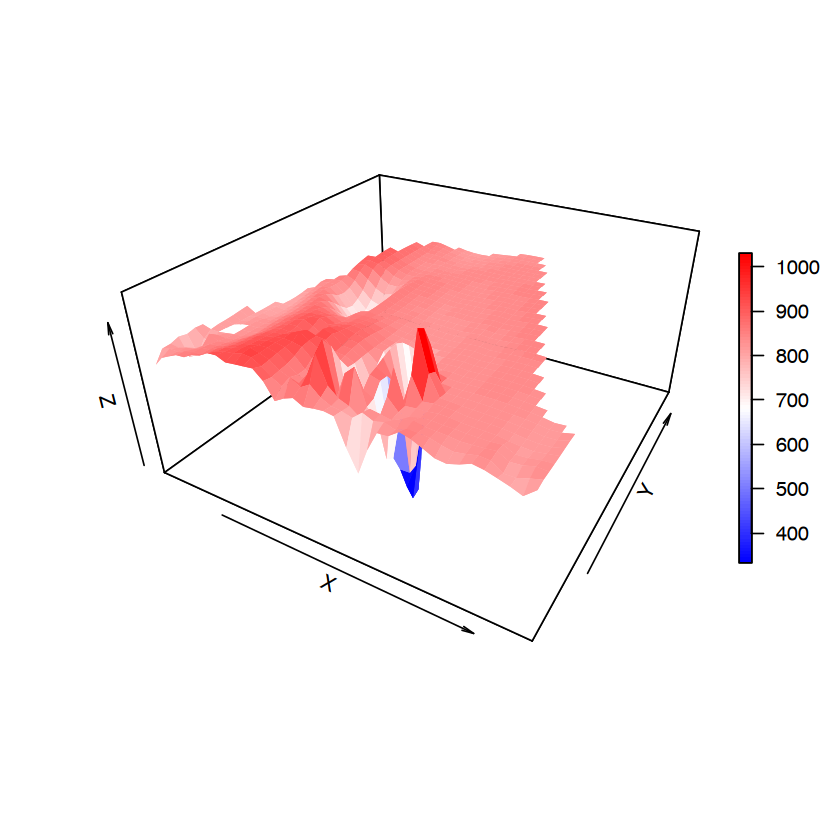

In [12]:
# Author: Piotr Rybarczyk

# Load necessary libraries
library(akima)
library(plot3D)

# Path to file with data
file_path <- './lib/data.csv'

# Read & parse data
data <- read.csv(file_path)
X <- data$x
Y <- data$y
Z <- data$z

# Build Grid data using akima's interp function
interp_data <- with(data, akima::interp(X, Y, Z, duplicate = "strip", linear = FALSE))

# Setup plot
# Using plot3D for 3D surface plot
persp3D(x = interp_data$x, y = interp_data$y, z = interp_data$z, 
        colvar = interp_data$z, 
        theta = 30, phi = 30, expand = 0.5, 
        colkey = list(length = 0.5, width = 0.5),
        xlab = 'X', ylab = 'Y', zlab = 'Z', 
        col = colorRampPalette(c("blue", "white", "red"))(100))
